---

# 🧠 Support Vector Machine (SVM) — Full Conceptual Notes

---

## 🔹 What is an SVM?

Support Vector Machine (SVM) is a **supervised learning algorithm** used for:

* **Classification**
* **Regression** (via Support Vector Regression - SVR)
* Primarily known for **binary classification**

---

## 🔸 Core Idea

SVM aims to find the **optimal separating hyperplane** between two classes:

* That **maximizes the margin** (distance from the hyperplane to the nearest points of either class)
* These nearest points are called **support vectors**

---

## 🔸 Intuition in 2D

```
Class 0 ● ●     ||     ● ● Class 1
              ↑ Margin
         --- SVM Hyperplane ---
```

* Larger margin = better generalization

---

## 🔹 Margin

Let $\vec{w}$ be the normal vector to the hyperplane:

```math
\text{Margin} = \frac{2}{\|\vec{w}\|}
```

---

## 🔸 Hard Margin vs Soft Margin

### ✅ Hard Margin:

* Assumes perfect linear separability
* No misclassification allowed

### ✅ Soft Margin:

* Allows some **misclassified points**
* Adds **slack variables** $\xi_i$
* Trade-off between margin size and misclassification

---

## 🔹 Optimization (Soft Margin SVM)

Given training data $\{(x_i, y_i)\}$, $y_i \in \{-1, +1\}$:

**Minimize:**

```math
\min_{\vec{w}, b, \xi} \left( \frac{1}{2} \|\vec{w}\|^2 + C \sum_{i=1}^{n} \xi_i \right)
```

**Subject to:**

```math
y_i(\vec{w}^T x_i + b) \geq 1 - \xi_i,\quad \xi_i \geq 0
```

* $C$: regularization parameter controlling penalty for margin violations

---

## 🔹 Decision Function

```math
f(x) = \text{sign}(\vec{w}^T x + b)
```

---

## 🔸 The Kernel Trick

To handle **non-linearly separable data**, SVM uses **kernel functions** to map data into higher-dimensional space **without computing the mapping explicitly**.

### 🔸 Common Kernels:

| Kernel         | Formula                                 |
| -------------- | --------------------------------------- |
| Linear         | $K(x, x') = x^T x'$                     |
| Polynomial     | $K(x, x') = (x^T x' + c)^d$             |
| RBF (Gaussian) | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$ |
| Sigmoid        | $K(x, x') = \tanh(\alpha x^T x' + c)$   |

---

## 🔹 Dual Formulation

Maximize:

```math
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
```

Subject to:

```math
0 \leq \alpha_i \leq C,\quad \sum_i \alpha_i y_i = 0
```

Only data points with $\alpha_i > 0$ are **support vectors**.

---

## 🔸 Pros & Cons

### ✅ Pros:

* Works well in high dimensions
* Robust with clear margin separation
* Memory efficient (only support vectors used)

### ❌ Cons:

* Doesn't perform well with overlapping classes
* Sensitive to choice of kernel and hyperparameters
* Slower on large datasets

---

## 🔸 Scikit-Learn Example

```python
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))
```

---

## 🧠 Tips

* Always **scale your data** (e.g., using `StandardScaler`) before using SVM
* Use **`GridSearchCV`** to tune `C`, `kernel`, and `gamma`
* Prefer **RBF kernel** for non-linear data

---


# ⚔️ Support Vector Machines (SVM)

---

## 📚 **Core Concept**
**Maximum margin classifier** that finds the optimal hyperplane separating classes by maximizing the distance to the closest points (**support vectors**).

---

## 🎯 **Mathematical Foundation**

### **Linear SVM Optimization:**
**Primal Problem:**
$$\min_{w,b,\xi} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^n \xi_i$$

**Subject to:**
$$y_i(w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$

**Decision Function:**
$$f(x) = \text{sign}(w^T x + b) = \text{sign}\left(\sum_{i=1}^n \alpha_i y_i K(x_i, x) + b\right)$$

### **Dual Formulation:**
$$\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2}\sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j K(x_i, x_j)$$

**Subject to:**
$$\sum_{i=1}^n \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C$$

---

## 🧠 **Key Concepts**

### **1. Support Vectors:**
Points on or within the margin:
- $\alpha_i > 0$ (active constraints)
- Determine the decision boundary
- Typical: 5-20% of training data

### **2. Margin:**
**Hard Margin:** $\gamma = \frac{2}{\|w\|}$ (linearly separable)
**Soft Margin:** Allows misclassification with penalty $C$

### **3. Hyperplane:**
$$w^T x + b = 0$$
- **Normal vector:** $w$ (perpendicular to hyperplane)
- **Bias term:** $b$ (offset from origin)

---

## 🔮 **Kernel Trick**

### **Concept:**
Map data to higher dimensional space without explicit computation:
$$K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$

### **Common Kernels:**

#### **1. Linear Kernel:**
$$K(x_i, x_j) = x_i^T x_j$$
- **Use**: Linearly separable data, high dimensions

#### **2. Polynomial Kernel:**
$$K(x_i, x_j) = (x_i^T x_j + r)^d$$
- **Parameters**: degree $d$, coefficient $r$
- **Use**: Moderate non-linearity

#### **3. RBF (Gaussian) Kernel:**
$$K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)$$
- **Parameter**: $\gamma = \frac{1}{2\sigma^2}$
- **Use**: Complex non-linear patterns

#### **4. Sigmoid Kernel:**
$$K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)$$
- **Use**: Neural network-like behavior

---

## ⚙️ **Hyperparameters**

### **C (Regularization Parameter):**
| C Value | Effect | Bias | Variance |
|---------|--------|------|----------|
| **Small C** | Wider margin, more errors | High | Low |
| **Large C** | Narrow margin, fewer errors | Low | High |

### **γ (RBF Kernel Parameter):**
| γ Value | Effect | Decision Boundary |
|---------|--------|-------------------|
| **Small γ** | Smooth, far influence | Simple |
| **Large γ** | Tight, close influence | Complex |

### **Parameter Selection:**
```python
# Grid search for optimal parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
```

---

## 🔄 **SVM Variants**

### **1. C-SVC (Classification):**
Standard SVM for classification problems

### **2. ν-SVC (Nu-SVM):**
Alternative parameterization using $\nu \in (0,1]$:
- $\nu$ bounds fraction of support vectors
- More intuitive than C

### **3. SVR (Support Vector Regression):**
**ε-insensitive loss:**
$$L_\varepsilon(y, f(x)) = \max(0, |y - f(x)| - \varepsilon)$$

**Optimization:**
$$\min_{w,b} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^n (\xi_i + \xi_i^*)$$

### **4. One-Class SVM:**
Novelty detection and outlier detection:
$$\min_{w,\xi,\rho} \frac{1}{2}\|w\|^2 + \frac{1}{\nu n}\sum_{i=1}^n \xi_i - \rho$$

---

## 💻 **Implementation**

```python
from sklearn.svm import SVC, SVR, OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocessing (crucial for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Classification
svm_clf = SVC(
    kernel='rbf',           # 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,                  # Regularization
    gamma='scale',          # Kernel coefficient
    probability=True,       # Enable probability estimates
    class_weight='balanced' # Handle imbalanced data
)

svm_clf.fit(X_scaled, y)
predictions = svm_clf.predict(X_test_scaled)

# Access support vectors
print(f"Support vectors: {svm_clf.n_support_}")
print(f"Support vector indices: {svm_clf.support_}")
```

---

## 📊 **Advantages vs Disadvantages**

### ✅ **Advantages:**
- **Effective in high dimensions**
- **Memory efficient** (uses support vectors)
- **Versatile** (different kernels)
- **Works well with small datasets**
- **Global optimum** (convex optimization)
- **Robust to overfitting** (especially in high-dim)

### ❌ **Disadvantages:**
- **No probabilistic output** (by default)
- **Sensitive to feature scaling**
- **Slow on large datasets** $O(n^3)$
- **Choice of kernel and parameters** crucial
- **No direct multi-class support**
- **Sensitive to outliers** (high C)

---

## 🎯 **Multi-class Strategies**

### **1. One-vs-One (OvO):**
- Train $\frac{k(k-1)}{2}$ binary classifiers
- **Prediction**: Majority voting
- **Default** in scikit-learn

### **2. One-vs-Rest (OvR):**
- Train $k$ binary classifiers
- **Prediction**: Highest confidence score
- **Faster** training, less memory

```python
# Explicitly choose strategy
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ovo_svm = OneVsOneClassifier(SVC(kernel='rbf'))
ovr_svm = OneVsRestClassifier(SVC(kernel='rbf'))
```

---

## 🔧 **Advanced Techniques**

### **1. Probability Calibration:**
```python
# SVM outputs are not well-calibrated probabilities
from sklearn.calibration import CalibratedClassifierCV
calibrated_svm = CalibratedClassifierCV(SVC(), method='platt')
```

### **2. Feature Scaling:**
```python
# Essential for SVM performance
from sklearn.preprocessing import StandardScaler, RobustScaler
# StandardScaler: zero mean, unit variance
# RobustScaler: robust to outliers
scaler = RobustScaler()
```

### **3. Handling Imbalanced Data:**
```python
# Class weighting
svm = SVC(class_weight='balanced')
# or custom weights
svm = SVC(class_weight={0: 1, 1: 10})
```

### **4. Custom Kernels:**
```python
# Define custom kernel function
def my_kernel(X, Y):
    return np.dot(X, Y.T)  # Example: linear kernel

svm = SVC(kernel=my_kernel)
```

---

## 🎯 **When to Use SVM**

### ✅ **Best for:**
- **Small to medium datasets** (< 100K samples)
- **High-dimensional data** (text, genomics)
- **Clear margin separation**
- **Non-linear relationships** (with kernels)
- **Binary classification** problems
- **Robust performance** needed

### ❌ **Avoid when:**
- **Very large datasets** (> 1M samples)
- **Many features with noise**
- **Probability estimates** crucial
- **Fast prediction** required
- **Highly imbalanced** data (without preprocessing)

---

## 🔧 **Practical Tips**

### **Kernel Selection Guide:**
- **Linear**: High dimensions, text data
- **RBF**: Default choice, non-linear patterns
- **Polynomial**: Specific domain knowledge
- **Sigmoid**: Rare, neural network alternative

### **Parameter Tuning Strategy:**
1. **Start simple**: Linear kernel
2. **Try RBF**: If linear insufficient
3. **Grid search**: Fine-tune C and γ
4. **Cross-validation**: Prevent overfitting

### **Performance Optimization:**
```python
# For large datasets
from sklearn.svm import LinearSVC  # Faster for linear cases
from sklearn.linear_model import SGDClassifier  # Scalable alternative

# Approximate solutions
linear_svm = LinearSVC(max_iter=10000)
sgd_svm = SGDClassifier(loss='hinge')  # SVM with SGD
```

---

## 📈 **Complexity Analysis**
- **Training**: $O(n^2)$ to $O(n^3)$ 
- **Prediction**: $O(n_{sv} \cdot d)$ where $n_{sv}$ = support vectors
- **Memory**: $O(n_{sv} \cdot d)$ - only stores support vectors

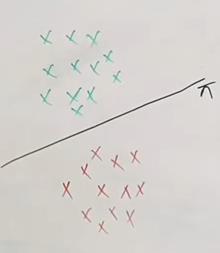

We want to maximize the margin between the data to generalize well

So, we need to find the hyperplane which is the best. This is why SVMs are sometimes are called margin maximizing hyperplane

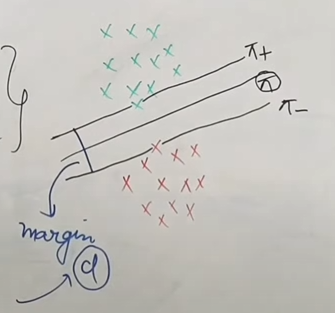

We need to maximize d. We send the hyperplane parallel to the model and then we get two hyperplanes which touch the other classes first. 

Those planes are called +ve and -ve hyperplanes

## Benefits

1) SVMs are very robust to outliers
2) Works even with non-linear data